## Predicting car prices using K Nearest Neighbors

In this notebook we will explore the application of the K Nearest Neighbors Algorithm to predict the a car's market price. We will practice the machine learning workflow. The data set we will be working with contains information on various cars. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and download the data from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/).  

We will be using the following libraries in this project -
- Pandas for data operations.
- Scikit learn for Machine Learning
- Matplot lib for plotting\visualizations
- Numpy for data operations


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

file = 'imports-85.data.txt'
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
                'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
               'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
               'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv(file, sep=',',header=None, names=column_names)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The next step is to identify continuous variable columns i.e. columns that have ordinal values that can be used to predict the prices. 
Luckily for us the data set description call's out the continuous variables.

In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke',
                         'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


A cursory review of the data reveals that there are missing values in the normalized-losses column, i.e. some of the rows in the column contains '?'. We cannot have any missing values in the data if we want to use it for predictive modelling. Let's replace these values and look for other numeric columns that contain missing values.

In [5]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
# Convert all numeric column types to float, Because ? is a string value, columns containing the value were cast to the pandas
# object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be
# converted to numeric types.
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
# Since 'price' is the column we want to predict, let's remove any rows with missing price values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# Replace missing values in other columns using column means
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [10]:
# Confirm that there's no missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [13]:
# Normalize all columns to range from 0 to 1 except the target column
price_col = numeric_cars['price']
numeric_cars = (numeric_cars.max() - numeric_cars)/(numeric_cars.max())
numeric_cars['price'] = price_col
numeric_cars.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Univariate Models -

Let's start with univariate models to asses which columns produce the least error. Starting with simple models before moving to more complex models help us structure the code worklfow and understand the features better.

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus 'price'), train a model, return RMSE value
# and add to the dictionary 'rmse_results'
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
# Create a series object from the dictionary so
# we can easily view the results and sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.532512
curb-weight          4448.106113
width                4694.316412
highway-mpg          4723.693742
city-mpg             5083.830963
length               5427.317131
wheel-base           5460.787788
compression-ratio    6610.809992
bore                 6795.388312
normalized-losses    7330.197653
peak-rpm             7675.425869
height               7799.633038
stroke               7922.009228
dtype: float64

In [18]:
def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit a KNN model using default k value
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model
        predictions = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

k_rmse_results = {}

# For each column (minus 'price'), train a model, return RMSE value 
# and add to the disctionary 'rmse_results'
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val
    
k_rmse_results

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6795.3883115355857,
  7: 6913.2663074106458,
  9: 6910.3702264278118},
 'city-mpg': {1: 5901.1435743547636,
  3: 4714.2225624737812,
  5: 5083.830963140118,
  7: 5501.9253807675768,
  9: 5327.5067180576852},
 'compression-ratio': {1: 8087.205346523092,
  3: 7347.8877670364354,
  5: 6610.8099915334433,
  7: 6738.2778283729058,
  9: 7082.4413906901354},
 'curb-weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4448.1061125066262,
  7: 4330.6701276238755,
  9: 4632.9252512130197},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 7799.6330375724774,
  7: 7631.0782033713222,
  9: 7819.9839198780146},
 'highway-mpg': {1: 6025.5949667207387,
  3: 4638.2728799770839,
  5: 4723.6937418017087,
  7: 4803.965891250672,
  9: 5137.9290496585554},
 'horsepower': {1: 4181.8361368240539,
  3: 4004.0769820956061,
  5: 4037.532511839182,
  7: 4384.0424536264509,
  9: 4505.9116537949794},
 'length': {1: 4611.9902417

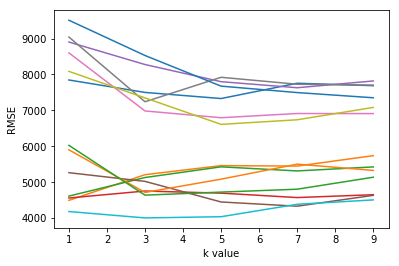

In [26]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    

### MultiVariate Models
Modify the knn_train_test function to accept a list of column names, modify the logic to use this parameter, instead of using single column for train and test, use all of the columns passed in.

In [27]:
# Compute average RMSE across different 'k' values for each features
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4222.679948
width                4645.632137
curb-weight          4739.661947
highway-mpg          5065.891306
length               5181.463051
wheel-base           5269.942030
city-mpg             5305.725840
compression-ratio    7173.324465
bore                 7241.170564
normalized-losses    7624.407151
stroke               7927.611447
height               8086.470252
peak-rpm             8112.917689
dtype: float64

From the above list, we can now select the best performing features.

In [31]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set
    # Select the second half as test set
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predictions using model
        predictions = knn.predict(test_df[train_cols])
        
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results['two best features'] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five best features'] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length', 'wheel-base']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results['six best features'] = rmse_val

k_rmse_results


{'five best features': {5: 3665.5466730458129},
 'four best features': {5: 3358.6915801682458},
 'six best features': {5: 3760.204908098905},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.5762113967917}}

### Model Optimization
Let's now optimize the model that performed the best in the previous step.

- For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
- Which k value is optimal for each model? How different are the k values and what do you think accounts for the differences?

In [33]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round
    last_train_row = int(len(rand_df)/2)
    
    # Select the first half and set as training set
    # Select the second half as test set
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [ i for i in range(1,26)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predictions using model
        predictions = knn.predict(test_df[train_cols])
        
        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
        
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results['two best features'] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results['four best features'] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results['five best features'] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length', 'wheel-base']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results['six best features'] = rmse_val

k_rmse_results


{'five best features': {1: 2773.8991269216394,
  2: 2936.0799655929732,
  3: 3152.3415515178144,
  4: 3488.5782221067402,
  5: 3665.5466730458129,
  6: 3563.9910249785435,
  7: 3714.6426773578878,
  8: 3927.6655582704293,
  9: 4074.7244115785479,
  10: 4202.6929198920652,
  11: 4228.8377103033245,
  12: 4280.7222580306225,
  13: 4323.694733441248,
  14: 4341.5980039409224,
  15: 4381.9106421084789,
  16: 4462.2109673182067,
  17: 4512.6661617597929,
  18: 4549.0242774286098,
  19: 4625.5422387034323,
  20: 4680.4075341436155,
  21: 4769.3002878389507,
  22: 4813.1714929806085,
  23: 4871.9560268480682,
  24: 4922.8896551073994,
  25: 4962.8588657317541},
 'four best features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.1274413966439,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.6780774154204,
  11: 4249.8272893472677,
  12: 4344.0358982374919,
  13: 4402.99

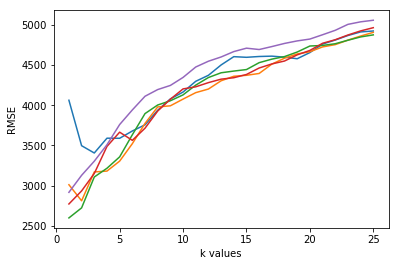

In [34]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)
    plt.xlabel("k values")
    plt.ylabel("RMSE")

In [35]:
# Calculate the average rmses for each of the feature set
avg_rmses ={}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.items()))
    avg_rmses[k] = avg_rmse

series_avg_rmses = pd.Series(avg_rmses)
series_avg_rmses.sort_values()

three best features    2067.757644
four best features     2081.040596
five best features     2091.039060
two best features      2155.315730
six best features      2189.801887
dtype: float64

### Conclusion
From the above output we can conclude that the three best features of ['horsepower', 'width', 'curb-weight'] produces the least error. We can further go through the k values for this feature to determine wich produces the least error. 

Here are some ideas for next steps:

Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
Modify the knn_train_test() function to perform the data cleaning as well.